In [110]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
import matplotlib as mpl
import seaborn as sns
from enm.Enm import Enm
from enm.utils import *
from tqdm import tqdm

In [2]:
with open('../data/interim/pcc.pickle' , 'rb') as f:
    e_pcc = pickle.load(f)

In [3]:
nodes = e_pcc.nodes
n = len(nodes)

In [7]:
effectors_df = pd.read_csv('../data/interim/effectors_df.csv')

In [8]:
sensors_df = pd.read_csv('../data/interim/sensors_df.csv')

In [54]:
sources = effectors_df.loc[effectors_df.effector_cluster==2]
targets = sensors_df.loc[sensors_df.gid==5]

In [69]:
def find_highest_prs_path(sources, targets, g, prs_mat_df):
    paths = []
    for s in sources.orf_name.tolist():
        w_track=0
        for t in targets.orf_name.tolist():
            p = list(nx.all_shortest_paths(g, s, t))
            p_weights = [prs_mat_df.loc[s,pp].sum() for pp in p]
            paths.append(p[np.argmax(p_weights)])
    #
    shortest_paths = [i for i in paths if len(i) == np.min([len(uu) for uu in paths])]
    path_weights = [prs_mat_df.loc[pp[0],pp].sum() for pp in shortest_paths]
    return shortest_paths[np.argmax(path_weights)]
#    return paths

In [88]:
all_paths = {0:{} , 1:{}, 2:{}}

In [89]:
for i in range(3):
    sources = effectors_df.loc[effectors_df.effector_cluster==i]
    for j in np.arange(1,10):
        targets = sensors_df.loc[sensors_df.gid==j]
        p = find_highest_prs_path(sources, targets,e_pcc.graph_gc, e_pcc.prs_mat_df)
        all_paths[i][j]=p

In [111]:
sensor_colors = [mpl.colors.to_hex(i) for i in sns.color_palette('Set3')]
effector_colors = ["#A65628", "#F781BF", "#999999",'blue','yellow','red']


In [175]:
name_dict = e_pcc.df.loc[:,['orf_name','Systematic gene name']].set_index('orf_name').to_dict()['Systematic gene name']

In [166]:
all_paths

{0: {1: ['mrc1', 'mcm4-5001', 'yat2', 'mob2-22', 'mob2-19'],
  2: ['mad2', 'gim5', 'rpl37a', 'rpl42b', 'sse1', 'ydj1', 'hsc82'],
  3: ['elg1', 'cdc9-5002', 'avt1', 'aep1', 'hap2', 'sdh4', 'sdh2', 'fum1'],
  4: ['bim1', 'clb4', 'ynl097c-b', 'apt1', 'aro8', 'yer046w-a', 'sip4'],
  5: ['mrc1', 'rad9', 'sbh2', 'sfc1', 'sit1', 'ftr1', 'fet3'],
  6: ['ctf4', 'hhf1', 'hht1', 'ydl159w-a', 'rtg1'],
  7: ['hrp1-4', 'pex1', 'tvp18', 'ubc6', 'yet2', 'sps18'],
  8: ['hrp1-4', 'dbf4-2', 'cwc2-1', 'nop1-3', 'jjj3', 'edc2', 'inm1'],
  9: ['mad2',
   'shp1',
   'abf1-102-supp1',
   'oar1',
   'lpd1-supp1',
   'hom3',
   'ydr157w',
   'bap2']},
 1: {1: ['arl3', 'mob2-11', 'mob2-14', 'mob2-34'],
  2: ['cog5', 'cbf1', 'cdc50', 'rpl42b', 'sse1', 'ydj1', 'hsc82'],
  3: ['cop1-1', 'ent5', 'ycf1', 'ecm29', 'sdh1', 'sdh2', 'fbp1'],
  4: ['ost3', 'chs2-5006', 'ydl206w', 'tae1', 'cst26', 'hpf1', 'ycr062w'],
  5: ['cog6', 'pkr1', 'tvp18', 'fit3', 'sit1', 'ftr1', 'fet3'],
  6: ['gab1-1', 'arv1', 'ecm31', 'ydl159w-

In [159]:
effectors_df['cluster']=['EC'+str(i+1) for i in effectors_df['effector_cluster'].tolist()]
effectors_df['is_effector']=True

In [140]:
sensors_df['cluster']=['SC'+str(i) for i in sensors_df['gid'].tolist()]
sensors_df['is_sensor']=True

In [141]:
pd.concat([effectors_df,sensors_df]).to_csv('../data/interim/eff_sens_combined_for_coloring.csv',index=False)

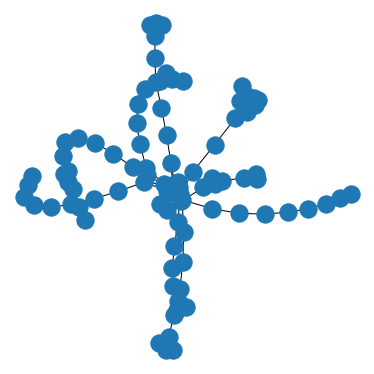

In [133]:
node_list = [*effectors_df.loc[effectors_df.effector_cluster==0].orf_name.tolist(), 
             *sensors_df.loc[sensors_df.gid!=0].orf_name.tolist(),
             *[item for sublist in [v for key,v in all_paths[0].items()] for item in sublist]]

node_sub = nx.induced_subgraph(e_pcc.graph_gc, node_list)

nx.draw(node_sub)
nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc,node_list),f'../data/interim/eff_sens_path0.csv', delimiter=',',data=False)

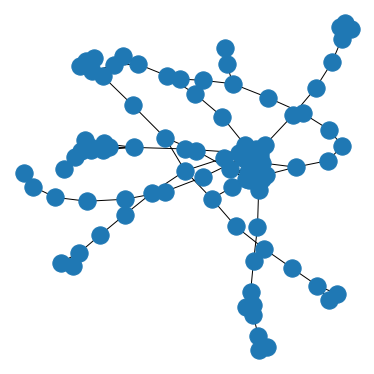

In [134]:
node_list = [*effectors_df.loc[effectors_df.effector_cluster==1].orf_name.tolist(), 
             *sensors_df.loc[sensors_df.gid!=0].orf_name.tolist(),
             *[item for sublist in [v for key,v in all_paths[1].items()] for item in sublist]]

node_sub = nx.induced_subgraph(e_pcc.graph_gc, node_list)

nx.draw(node_sub)
nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc,node_list),f'../data/interim/eff_sens_path1.csv', delimiter=',',data=False)

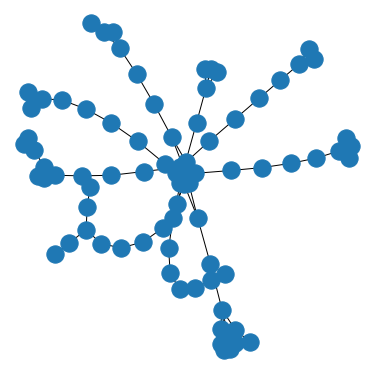

In [135]:
node_list = [*effectors_df.loc[effectors_df.effector_cluster==2].orf_name.tolist(), 
             *sensors_df.loc[sensors_df.gid!=0].orf_name.tolist(),
             *[item for sublist in [v for key,v in all_paths[2].items()] for item in sublist]]

node_sub = nx.induced_subgraph(e_pcc.graph_gc, node_list)

nx.draw(node_sub)
nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc,node_list),f'../data/interim/eff_sens_path2.csv', delimiter=',',data=False)

In [107]:
pos = e_pcc.graph_gc.nodes('pos')

In [160]:
sensor_color_map = dict(zip(sensors_df.cluster.sort_values().unique()[1:10],sensor_colors[1:10]))
effector_color_map = dict(zip(effectors_df.cluster.sort_values().unique(),effector_colors[:3]))

In [161]:
sensor_legend_elements = [Line2D([0], [0], marker='^', color='black', label=label,
                              markerfacecolor=color, markersize=10, linestyle="None") for label,color in sensor_color_map.items()] 
effector_legend_elements = [Line2D([0], [0], marker='o', color='black', label=label,
                              markerfacecolor=color, markersize=10, linestyle="None") for label,color in effector_color_map.items()] 

In [162]:
legend_elements = [*effector_legend_elements, 
                   *sensor_legend_elements,
                   *[Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=10, linestyle="None"),
                     Line2D([0], [0], marker='o', color='black', label= 'PCC ≥ 0.2',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=5)
                    ]]

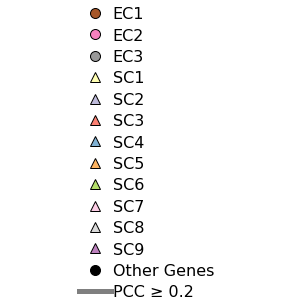

<Figure size 216x72 with 0 Axes>

In [165]:
fig = plt.figure()
figlegend = plt.figure(figsize=(3,1))
ax = fig.add_subplot(111)
#lines = ax.plot(range(10), plt.randn(10), range(10), plt.randn(10))
ax.axis('off')
lgd = ax.legend(handles=legend_elements,
                handletextpad=0.1, 
                labelspacing=0.4, 
                borderpad=0,
                columnspacing=0.4,
                fontsize=16, 
                ncol=1,
                frameon=False, 
                loc = 'center',
                bbox_to_anchor=(0., 0., 1, 1))
#if snakemake.params['save']:
fig.savefig(f'../reports/figures/paper_figures_supp/figs6_legend.png', dpi=150, pad_inches=0)#, bbox_inches='tight')

NameError: name 'sensor_order' is not defined

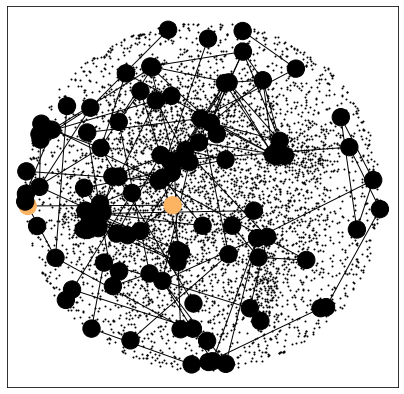

In [112]:
#if plot_paths:
eff_group = 'Respiratory complex assembly'
sens_group = 'SC5\nIron ion\ntransport'
node_list = [*effectors_df.loc[effectors_df.effector_cluster==0].orf_name.tolist(), 
             *sensors_df.orf_name.tolist(),
             *[item for sublist in [v for key,v in all_paths[0].items()] for item in sublist]]

node_sub = nx.induced_subgraph(e_pcc.graph_gc, node_list)
#node_sub=nx.induced_subgraph(sub,[i for i in l1 if i !=target])
#print(l1)
fig, ax = plt.subplots(figsize=(7,7))
legend_elements = [    ]
nx.draw_networkx_nodes(e_pcc.graph_gc, pos=pos, node_size=1, ax=ax, node_color='black')
nx.draw_networkx_nodes(node_sub,pos=pos,alpha=1,
                    #  node_size = [prs_mat_df.loc[source,:].to_dict()[i]*10000 for i in sub.nodes],
                    # node_shape = ['^' if i == target else 'o' for i in sub.nodes],
    node_color = [sensor_colors[5]  if i in ['sit1','ftr1'] else 'black' for i in node_sub.nodes])
nx.draw_networkx_edges(sub,pos=pos)
for itr, i in enumerate(sensor_order):
    #print(i, effector_colors[itr])
    if i ==sens_group:
        orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
        sub_list.extend(orf_names_to_plot)
        nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                            node_color=sensor_colors[itr],
                            node_shape='^',edgecolors='black',
                            linewidths=1)
        nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, orf_names_to_plot), ax=ax , pos=pos, edge_color='red',alpha=0.5)

        legend_elements.append(
            Line2D([0], [0], marker='^', color='black', label=f'Sensors ({i})',
                                markerfacecolor=sensor_colors[itr], markersize=12, linestyle="None")
        )

for itr, i in enumerate(effector_order):
    if i == eff_group:
        orf_names_to_plot = effector_pcc.loc[effector_pcc.go_group==i,'orf_name'].tolist()
        sub_list.extend(orf_names_to_plot)
        nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                            node_color=effector_colors[itr],
                            node_shape='s',edgecolors='black',
                            linewidths=1)
        nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, orf_names_to_plot), ax=ax , pos=pos, edge_color='blue',alpha=0.5)

ax.set_facecolor('white')
ax.axis('off')

# if snakemake.params['save']:
#     plt.savefig(f'{figure_folder}/fig5f.png',bbox_inches='tight',dpi=150)
# nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc,sub_list),f'{figure_folder}/path2.csv', delimiter=',',data=False)

In [217]:
([print(name_dict[i]) for i in all_paths[2][9]])

YLR091W
YLR239C
YFL018C
YER052C
YDR157W
YBR068C


[None, None, None, None, None, None]

In [207]:
from gprofiler import GProfiler

In [223]:
[name_dict[i] for i in all_paths[2][9]][1:-1]

['YLR239C', 'YFL018C', 'YER052C', 'YDR157W']

In [226]:
gp = GProfiler(return_dataframe=True)
gp_res = gp.profile(organism = 'scerevisiae', 
           query = [name_dict[i] for i in all_paths[2][9]][1:])

In [296]:
gp = GProfiler(return_dataframe=True)
gp_res0 = gp.profile(organism = 'scerevisiae', 
           query = {f"query{i}":[name_dict[v] for v in val[1:-1]]  for i,val in all_paths[0].items()},
            background = e_pcc.df['Systematic gene name'].tolist())
gp_res1 = gp.profile(organism = 'scerevisiae', 
           query = {f"query{i}":[name_dict[v] for v in val[1:-1]]  for i,val in all_paths[1].items()},
            background = e_pcc.df['Systematic gene name'].tolist())
gp_res2 = gp.profile(organism = 'scerevisiae', 
           query = {f"query{i}":[name_dict[v] for v in val[1:-1]]  for i,val in all_paths[2].items()},
            background = e_pcc.df['Systematic gene name'].tolist())

In [297]:
gp_res1.sort_values('query')

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
26,KEGG,KEGG:04141,Protein processing in endoplasmic reticulum,0.036208,True,Protein processing in endoplasmic reticulum,78,5,2,4658,0.400000,0.025641,query2,[KEGG:00000]
23,GO:MF,GO:0060590,ATPase regulator activity,0.018405,True,"""Binds to and modulates the activity of an ATP...",25,5,2,4658,0.400000,0.080000,query2,[GO:0060589]
0,GO:MF,GO:0008177,succinate dehydrogenase (ubiquinone) activity,0.000062,True,"""Catalysis of the reaction: succinate + ubiqui...",2,5,2,4658,0.400000,1.000000,query3,"[GO:0000104, GO:0016635]"
28,KEGG,KEGG:01200,Carbon metabolism,0.039015,True,Carbon metabolism,81,5,2,4658,0.400000,0.024691,query3,[KEGG:00000]
25,GO:MF,GO:0009055,electron transfer activity,0.032282,True,"""Any molecular entity that serves as an electr...",33,5,2,4658,0.400000,0.060606,query3,[GO:0016491]
21,WP,WP:WP112,Principle Pathways of Carbon Metabolism,0.016749,True,Principle Pathways of Carbon Metabolism,57,5,2,4658,0.400000,0.035088,query3,[WP:000000]
19,KEGG,KEGG:00190,Oxidative phosphorylation,0.015554,True,Oxidative phosphorylation,51,5,2,4658,0.400000,0.039216,query3,[KEGG:00000]
11,KEGG,KEGG:00020,Citrate cycle (TCA cycle),0.003406,True,Citrate cycle (TCA cycle),24,5,2,4658,0.400000,0.083333,query3,[KEGG:00000]
9,WP,WP:WP490,TCA Cycle,0.002938,True,TCA Cycle,24,5,2,4658,0.400000,0.083333,query3,[WP:000000]
16,GO:MF,GO:0016627,"oxidoreductase activity, acting on the CH-CH g...",0.011682,True,"""Catalysis of an oxidation-reduction (redox) r...",20,5,2,4658,0.400000,0.100000,query3,[GO:0016491]


In [285]:
sensors_dict_ = sensors_df.groupby('gid')[['Systematic gene name']].apply(lambda g: g.values.tolist()).to_dict()
sensors_dict = {key:[i[0] for i in val] for key,val in sensors_dict_.items()}

In [294]:
gp = GProfiler(return_dataframe=True)
gp_res = gp.profile(organism = 'scerevisiae', 
           query = sensors_dict,
            background = e_pcc.df['Systematic gene name'].tolist(), no_evidences=False)

In [295]:
gp_res.loc[gp_res['source']!='HP'].sort_values('query')

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
116,GO:MF,GO:0030544,Hsp70 protein binding,0.049927,True,"""Interacting selectively and non-covalently wi...",1,3,1,4658,0.333333,1.000000,2,[GO:0031072],[YOR027W],[[IDA]]
115,GO:MF,GO:0004333,fumarate hydratase activity,0.049927,True,"""Catalysis of the reaction: (S)-malate = fumar...",1,3,1,4658,0.333333,1.000000,3,[GO:0016836],[YPL262W],"[[IDA, IEA]]"
114,GO:MF,GO:0042132,"fructose 1,6-bisphosphate 1-phosphatase activity",0.049927,True,"""Catalysis of the reaction: D-fructose 1,6-bis...",1,3,1,4658,0.333333,1.000000,3,[GO:0050308],[YLR377C],"[[IDA, IEA]]"
95,WP,WP:WP361,Xylulose-monophosphate cycle,0.039978,True,Xylulose-monophosphate cycle,4,3,1,4658,0.333333,0.250000,3,[WP:000000],[YLR377C],[[WP]]
32,WP,WP:WP112,Principle Pathways of Carbon Metabolism,0.006801,True,Principle Pathways of Carbon Metabolism,57,3,2,4658,0.666667,0.035088,3,[WP:000000],"[YLR377C, YPL262W]","[[WP], [WP]]"
41,KEGG,KEGG:01200,Carbon metabolism,0.008602,True,Carbon metabolism,81,3,2,4658,0.666667,0.024691,3,[KEGG:00000],"[YLR377C, YPL262W]","[[KEGG], [KEGG]]"
117,GO:MF,GO:0008108,UDP-glucose:hexose-1-phosphate uridylyltransfe...,0.049927,True,"""Catalysis of the reaction: alpha-D-galactose ...",1,2,1,4658,0.500000,1.000000,4,[GO:0070569],[YBR018C],"[[IDA, IEA]]"
76,WP,WP:WP546,Lactose degradation and Galactose metabolism,0.029950,True,Lactose degradation and Galactose metabolism,3,2,1,4658,0.500000,0.333333,4,[WP:000000],[YBR018C],[[WP]]
113,GO:MF,GO:0004322,ferroxidase activity,0.049927,True,"""Catalysis of the reaction: 4 Fe2+ + 4 H+ + O2...",1,3,1,4658,0.333333,1.000000,5,[GO:0016724],[YMR058W],[[IDA]]
112,GO:MF,GO:0016724,"oxidoreductase activity, acting on metal ions,...",0.049927,True,"""Catalysis of an oxidation-reduction in which ...",1,3,1,4658,0.333333,1.000000,5,[GO:0016722],[YMR058W],[[IDA]]
